In [1]:
import healpy as hp
from astropy.io import fits
import numpy as np
import treecorr
import esutil
# from pixell import utils, bunch
# import numpy as np, pyccl, time
# import pyccl
import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl
pl.rcParams.update({
    "text.usetex": False,
    "font.family": "DejaVu Sans"
})






In [2]:
# len(M200m_websky)
def ang2eq(theta, phi):
    ra = phi * 180. / np.pi
    dec = 90. - theta * 180. / np.pi
    return ra, dec


def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

def get_zmean(zcent,delz,nz_bin):
    prob_zcent = nz_bin
    zmean = (np.sum(prob_zcent*zcent*delz))/(np.sum(prob_zcent*delz))
    return zmean


In [4]:
ldir = '/Users/shivam/Library/CloudStorage/Dropbox/research/yuuki_data/'
ksz_noiseless_yuuki = hp.read_map(ldir + 'yuuki/ksz/mdpl2_lkszNG_bahamas76_rot_sum_4_176_bnd_unb_1.0e+12_1.0e+18_v103021_lmax24000_nside8192_interp1.6_method1_1_lensed_map.fits')
ksz_noiseless_yuuki = hp.ud_grade(ksz_noiseless_yuuki, 2048)




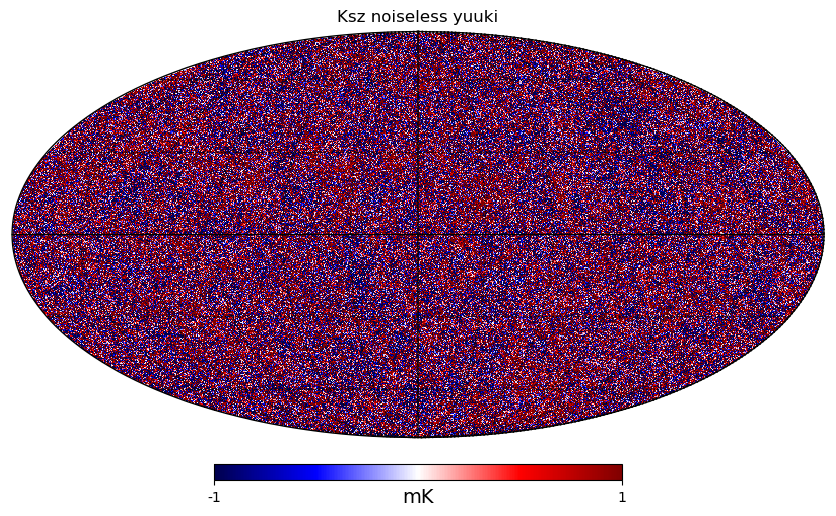

In [5]:
hp.mollview(ksz_noiseless_yuuki, title='Ksz noiseless yuuki', unit='mK', norm='hist', min=-1, max=1, cmap='seismic')
hp.graticule()


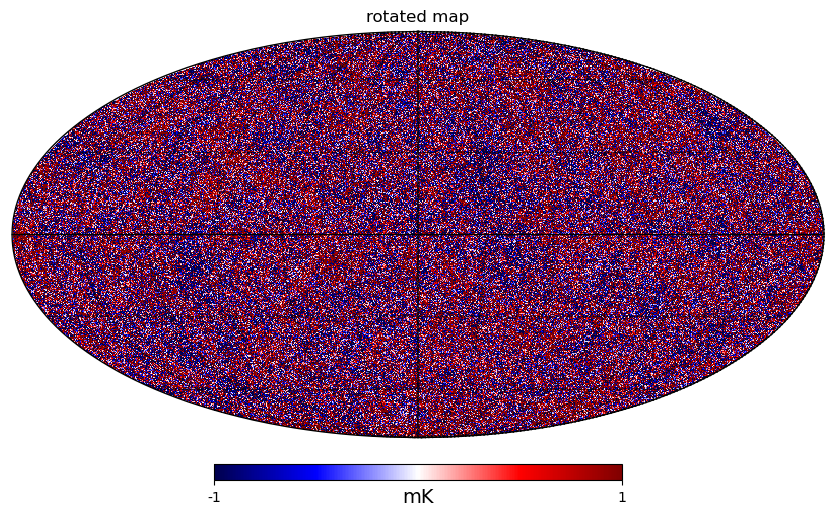

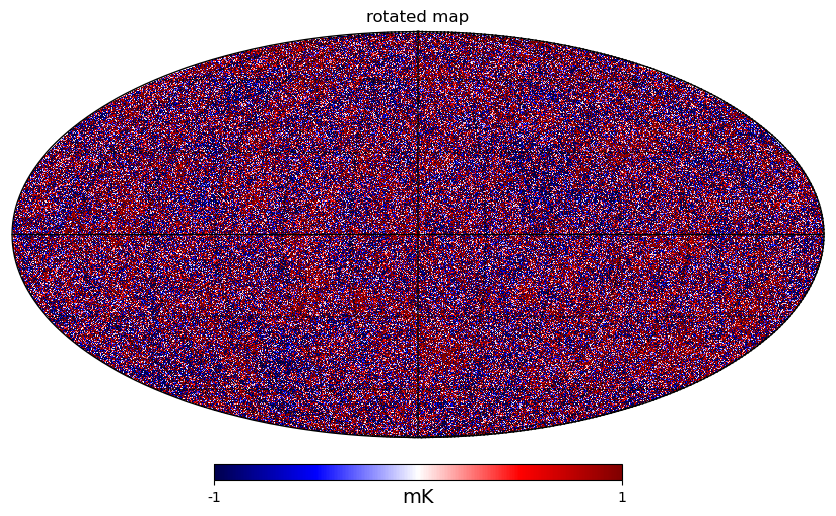

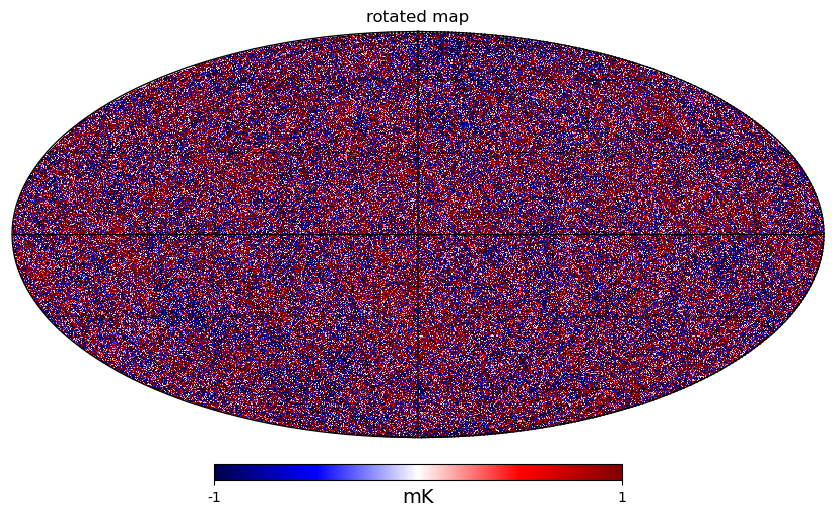

In [8]:
import healpy.rotator as rotator
all_cens = np.loadtxt('./center_ra_dec_njk150.txt').T
# for jc in (range(len(all_cens))):
for jc in (range(3)):    
    raj, decj = all_cens[jc][0], all_cens[jc][1]
    r = rotator.Rotator(rot=[raj, decj])
    ksz_noiseless_yuuki_rot = r.rotate_map_pixel(ksz_noiseless_yuuki)
    hp.mollview(ksz_noiseless_yuuki_rot, title='rotated map', unit='mK', norm='hist', min=-1, max=1, cmap='seismic')
    hp.graticule()
    
    


In [2]:
M_lim = 1e14
z_lim = 0.5


In [4]:


from   cosmology import *
rho = 2.775e11*omegam*h**2 # Msun/Mpc^3
f=open('/global/cfs/cdirs/lsst/www/shivamp/tenki/halos.pksc')
N=np.fromfile(f,count=3,dtype=np.int32)[0]
catalog=np.fromfile(f,count=N*10,dtype=np.float32)
catalog=np.reshape(catalog,(N,10))
x  = catalog[:,0];  y = catalog[:,1];  z = catalog[:,2] # Mpc (comoving)
vx = catalog[:,3]; vy = catalog[:,4]; vz = catalog[:,5] # km/sec
R  = catalog[:,6] # Mpc
catalog = 0
del catalog
import gc
gc.collect()
# convert to mass, comoving distance, radial velocity, redshfit, RA and DEc
M200m_all    = h*4*np.pi/3.*rho*R**3        # this is M200m (mean density 200 times mean) in Msun
indsel = np.where(M200m_all > M_lim)[0]
M200m_all = M200m_all[indsel]
vx, vy, vz = vx[indsel], vy[indsel], vz[indsel]
x, y, z = x[indsel], y[indsel], z[indsel]
chi      = np.sqrt(x**2+y**2+z**2)    # Mpc
vrad     = (x*vx + y*vy + z*vz) / chi # km/sec
redshift_all = zofchi(chi)      
indsel = np.where(redshift_all < z_lim)[0]
redshift_websky = redshift_all[indsel]
M200m_websky = M200m_all[indsel]
Vr_websky = vrad[indsel]

# import numpy as np
# filename = 'skyhalo_nres13r000.halo'
# with open(filename, 'rb') as f:
#     n_halo = np.fromfile(f, dtype='int32', count=1)[0]
#     ID = np.fromfile(f, dtype='int32', count=n_halo) 
#     PID = np.fromfile(f, dtype='int32', count=n_halo)
#     Mvir = np.fromfile(f, dtype='float32', count=n_halo)
#     M200b = np.fromfile(f, dtype='float32', count=n_halo)
#     M200c = np.fromfile(f, dtype='float32', count=n_halo)
#     M500c = np.fromfile(f, dtype='float32', count=n_halo)
#     M2500c = np.fromfile(f, dtype='float32', count=n_halo)
#     Rvir = np.fromfile(f, dtype='float32', count=n_halo)
#     Rs = np.fromfile(f, dtype='float32', count=n_halo)
#     z_halo = np.fromfile(f, dtype='float32', count=n_halo)
#     r_halo = np.fromfile(f, dtype='float32', count=n_halo)
#     Vr = np.fromfile(f, dtype='float32', count=n_halo)
#     theta_i = np.fromfile(f, dtype='float32', count=n_halo)
#     phi_i = np.fromfile(f, dtype='float32', count=n_halo)
#     theta_s = np.fromfile(f, dtype='float32', count=n_halo)
#     phi_s = np.fromfile(f, dtype='float32', count=n_halo)
#     ipix = np.fromfile(f, dtype='int64', count=n_halo)
#     multi = np.fromfile(f, dtype='int16', count=n_halo)
#     lplane = np.fromfile(f, dtype='int16', count=n_halo)
#     hc_list = np.fromfile(f, dtype='int16', count=n_halo)

# indsel = np.where((M200b > M_lim) & (z_halo < z_lim))[0]
# M200b_tk = M200b[indsel]
# Vr_tk = Vr[indsel]








In [7]:
# len(M200m_websky)
def ang2eq(theta, phi):
    ra = phi * 180. / np.pi
    dec = 90. - theta * 180. / np.pi
    return ra, dec


def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

def get_zmean(zcent,delz,nz_bin):
    prob_zcent = nz_bin
    zmean = (np.sum(prob_zcent*zcent*delz))/(np.sum(prob_zcent*delz))
    return zmean

theta, phi  = hp.vec2ang(np.column_stack((x[indsel],y[indsel],z[indsel]))) # in radians

datapoint_ra, datapoint_dec = ang2eq(theta, phi)
datapoint_w = np.ones_like(datapoint_ra)
nrand = 5*len(datapoint_ra)
rand_ra, rand_dec = esutil.coords.randsphere(nrand, ra_range=[0,360], dec_range=[-90,90])
rand_theta, rand_phi = eq2ang(rand_ra, rand_dec)
rand_w = np.ones_like(rand_ra)








In [9]:
# len(datapoint_ra)
saved = {'halo_ra':datapoint_ra, 'halo_dec':datapoint_dec, 'rand_ra':rand_ra, 'rand_dec':rand_dec}
pk.dump(save, open('halos_cut_websky_1e14_z0p5.pk','wb'))



NameError: name 'save' is not defined

In [3]:
# df = np.load('/pscratch/sd/s/spandey/yuuki/halolc/haloslc_rot_52.npy')
# # list(df)
# # df.shape
# np.amax(df[:,2])

all_ind = np.arange(0,52)
# all_ind
zall, vall, mall, ra_all, dec_all = [], [], [], [], []
from tqdm import tqdm
for ji in tqdm(range(len(all_ind))):
    df = np.load('/pscratch/sd/s/spandey/yuuki/halolc/haloslc_rot_' + str(ji+1) + '.npy')
    m200c = df[:,3]
    indsel = np.where(m200c > M_lim)[0]
    zsel = df[:,2][indsel]
    vsel = df[:,7][indsel]
    rasel = df[:,0][indsel]
    decsel = df[:,1][indsel]   
    msel = m200c[indsel]
    indsel = np.where(zsel < z_lim)[0]
    zsel = zsel[indsel]
    vsel = vsel[indsel]
    rasel = rasel[indsel]
    decsel = decsel[indsel]
    msel = msel[indsel]
    zall.append(zsel)
    vall.append(vsel)
    ra_all.append(rasel)
    dec_all.append(decsel)
    mall.append(msel)
    





  0%|          | 0/52 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/pscratch/sd/s/spandey/yuuki/halolc/haloslc_rot_1.npy'

In [4]:
# np.vstack((zall)).shape
zall = np.hstack((zall))
mall = np.hstack((mall))
vall = np.hstack((vall))


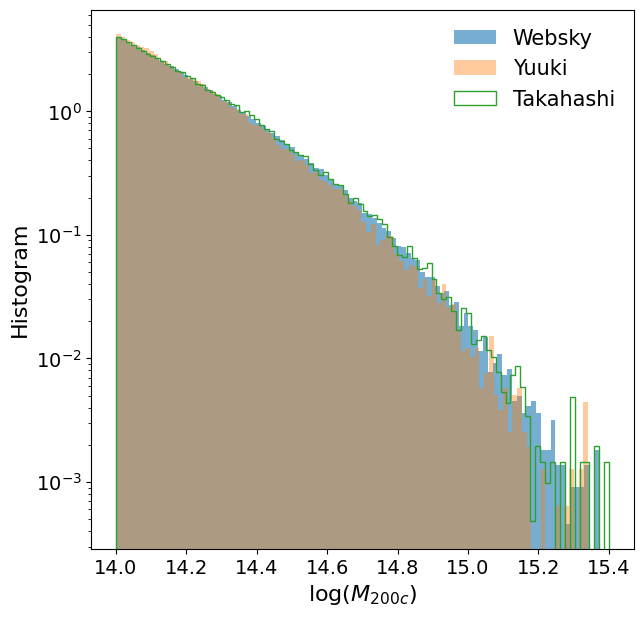

In [21]:
pl.figure()

_ = pl.hist(np.log10((M200m_websky)), bins=100,alpha=0.6, density=True, label='Websky')
_ = pl.hist(np.log10((mall)), bins=100, alpha=0.4, histtype='bar', density=True, label='Yuuki')
_ = pl.hist(np.log10((M200b_tk)), bins=100, histtype='step', density=True, label='Takahashi')
# _ = pl.hist(np.log10((M200c)), bins=100, histtype='step', range=(14,15), density=True, color='k')
pl.yscale('log')
pl.legend(fontsize=15, frameon=False)
pl.xlabel(r'$\log(M_{200c})$', size=16)
pl.ylabel(r'Histogram', size=16)
pl.tick_params(axis='both', labelsize=14)
# pl.ylim(1e-3,4)
# pl.savefig('test_M500c.pdf')





In [16]:
# pl.figure()

# _ = pl.hist(np.log10((M200m_websky)), bins=100,alpha=0.6, density=True, label='Websky')
# # _ = pl.hist(np.log10((M200b)), bins=100, histtype='step', range=(12,16), density=True)
# _ = pl.hist(np.log10((M200b_tk)), bins=100, histtype='step', density=True, label='Takahashi')
# # _ = pl.hist(np.log10((M200c)), bins=100, histtype='step', range=(14,15), density=True, color='k')
# pl.yscale('log')
# pl.legend(fontsize=15, frameon=False)
# pl.xlabel(r'$\log(M_{200c})$', size=16)
# pl.ylabel(r'Histogram', size=16)
# pl.tick_params(axis='both', labelsize=14)
# # pl.ylim(1e-3,4)
# # pl.savefig('test_M500c.pdf')



In [23]:
print(np.mean(Vr_tk), np.mean(Vr_websky), np.mean(vall)/1e3)




-12.715695 -2.4619262 1.2933193190924237


(1e-06, 0.003)

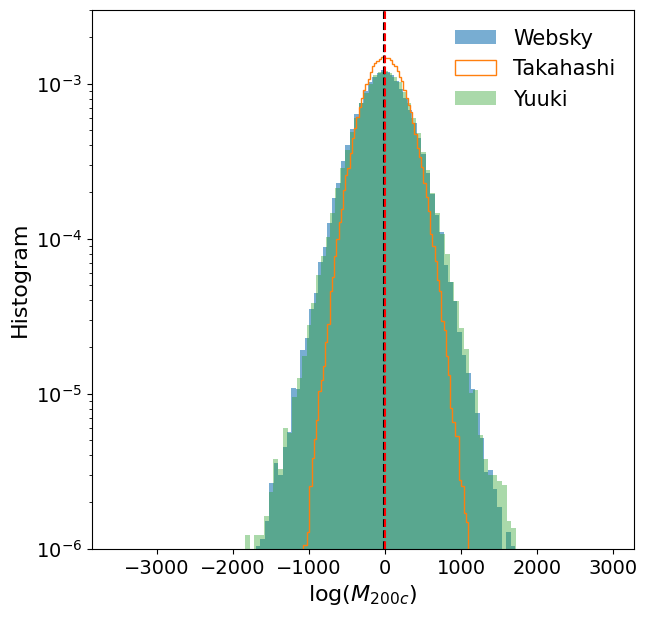

In [19]:
pl.figure()

_ = pl.hist(Vr_tk, bins=100,alpha=0.6, density=True, label='Websky')
# _ = pl.hist(np.log10((M200b)), bins=100, histtype='step', range=(12,16), density=True)
_ = pl.hist(Vr_websky, bins=100, histtype='step', density=True, label='Takahashi')
_ = pl.hist(vall/1e3, bins=100, histtype='bar', alpha=0.4, density=True, label='Yuuki')
pl.axvline(np.mean(Vr_tk),ls='--',color='k')
pl.axvline(np.mean(Vr_websky),ls='--', color='r')
# _ = pl.hist(np.log10((M200c)), bins=100, histtype='step', range=(14,15), density=True, color='k')
pl.yscale('log')
pl.legend(fontsize=15, frameon=False)
pl.xlabel(r'$\log(M_{200c})$', size=16)
pl.ylabel(r'Histogram', size=16)
pl.tick_params(axis='both', labelsize=14)
pl.ylim(1e-6, 3e-3)
# pl.ylim(1e-3,4)
# pl.savefig('test_M500c.pdf')





In [27]:
# if sim_type == 'takahashi':
ksz_noiseless_tk = hp.read_map('allsky_HP_kSZ_nres13_r000.fits')
ksz_noiseless_tk = hp.ud_grade(ksz_noiseless_tk, 2048)
# if sim_type == 'websky':
ksz_noiseless_websky = hp.read_map('ksz.fits')
ksz_noiseless_websky = hp.ud_grade(ksz_noiseless_websky, 2048)




In [24]:
# ksz_noiseless_tk
ksz_noiseless_yuuki = hp.read_map('/pscratch/sd/s/spandey/yuuki/ksz/mdpl2_lkszNG_bahamas76_rot_sum_4_176_bnd_unb_1.0e+12_1.0e+18_v103021_lmax24000_nside8192_interp1.6_method1_1_lensed_map.fits')
ksz_noiseless_yuuki = hp.ud_grade(ksz_noiseless_yuuki, 2048)



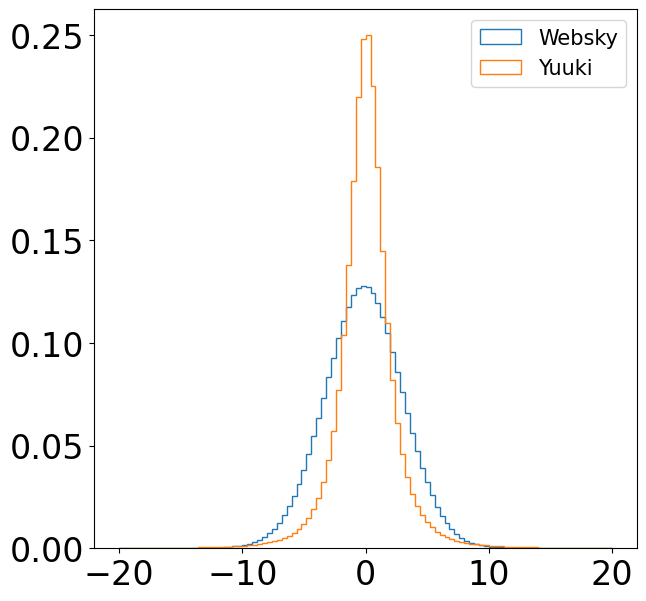

In [32]:
pl.figure()
# _ = pl.hist(ksz_noiseless_tk*1e6, bins=100,alpha=0.6, range=(-20,20), density=True, label='Takahashi')
_ = pl.hist(ksz_noiseless_websky, bins=100, histtype='step', range=(-20,20), density=True, label='Websky')
_ = pl.hist(ksz_noiseless_yuuki, bins=100, histtype='step', range=(-20,20), density=True, label='Yuuki')
pl.legend(fontsize=15)



In [33]:
# # theta.shape
# ### e.g. project to a map, matching the websky orientations
# nside = 1024
# maph   = np.zeros((hp.nside2npix(nside)))

# # pix = hp.vec2pix(nside, x, y, z)
# pix = hp.ang2pix(nside, theta, phi)
# weight = 1. #1 for number density, array of size(x) for arbitrary
# np.add.at(maph, pix, weight)



In [34]:
# hp.mollview(np.log(maph))


In [5]:
def ang2eq(theta, phi):
    ra = phi * 180. / np.pi
    dec = 90. - theta * 180. / np.pi
    return ra, dec


def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

def get_zmean(zcent,delz,nz_bin):
    prob_zcent = nz_bin
    zmean = (np.sum(prob_zcent*zcent*delz))/(np.sum(prob_zcent*delz))
    return zmean







In [6]:
# datapoint_ra, datapoint_dec = ang2eq(theta, phi)
datapoint_ra, datapoint_dec = np.hstack((ra_all)), np.hstack((dec_all))
datapoint_w = np.ones_like(datapoint_ra)
nrand = 5*len(datapoint_ra)
rand_ra, rand_dec = esutil.coords.randsphere(nrand, ra_range=[0,360], dec_range=[-90,90])
# rand_theta, rand_phi = eq2ang(rand_ra, rand_dec)
rand_w = np.ones_like(rand_ra)




In [7]:
do_jk = True
put_weights_datapoints = True
do_randy_sub = True
# njk = 500
# min_r = 0.1
# max_r = 80.
nthreads = 256
bin_slop = 0.0

minrad = 1.0
maxrad = 100.0    
nrad = 20
njk = 256




In [8]:
import sys, os
save_dir_jk = '/global/cfs/cdirs/lsst/www/shivamp/ksz_test/'
save_filename_jk_obj = 'temp_jk_centers_njk' + str(njk)
if os.path.isfile(save_dir_jk + save_filename_jk_obj):
    datapoint_cat = treecorr.Catalog(ra=datapoint_ra, dec=datapoint_dec, w=datapoint_w, ra_units='degrees',
                                dec_units='degrees', patch_centers=save_dir_jk + save_filename_jk_obj)           

else:
    datapoint_cat = treecorr.Catalog(ra=datapoint_ra, dec=datapoint_dec, w=datapoint_w, ra_units='degrees',
                                    dec_units='degrees', npatch=njk)
    datapoint_cat.write_patch_centers(save_dir_jk + save_filename_jk_obj)
rand_cat = treecorr.Catalog(ra=rand_ra, dec=rand_dec, w=rand_w, ra_units='degrees', dec_units='degrees', patch_centers=save_dir_jk + save_filename_jk_obj)




In [9]:
# if sim_type == 'takahashi':
#     ksz_noiseless = hp.read_map('allsky_HP_kSZ_nres13_r000.fits')
#     ksz_noiseless = hp.ud_grade(ksz_noiseless, 2048)
# if sim_type == 'websky':
#     ksz_noiseless = hp.read_map('ksz.fits')
#     ksz_noiseless = hp.ud_grade(ksz_noiseless, 2048)
ksz_noiseless = hp.read_map('/pscratch/sd/s/spandey/yuuki/ksz/mdpl2_lkszNG_bahamas76_rot_sum_4_176_bnd_unb_1.0e+12_1.0e+18_v103021_lmax24000_nside8192_interp1.6_method1_1_lensed_map.fits')
ksz_noiseless = hp.ud_grade(ksz_noiseless, 2048)




In [10]:
# np.var(ksz_noiseless)
# ksz_noise = np.random.randn(len(ksz_noiseless)) * (10*np.std(ksz_noiseless))
ksz_noise = np.random.randn(len(ksz_noiseless)) * (10*np.std(ksz_noiseless))



In [11]:
ksz = ksz_noiseless + ksz_noise


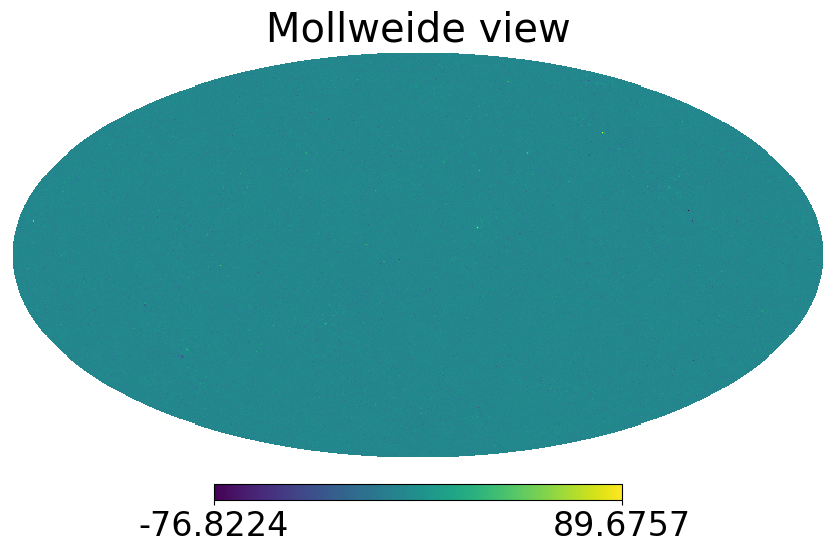

In [12]:
hp.mollview(ksz_noiseless)



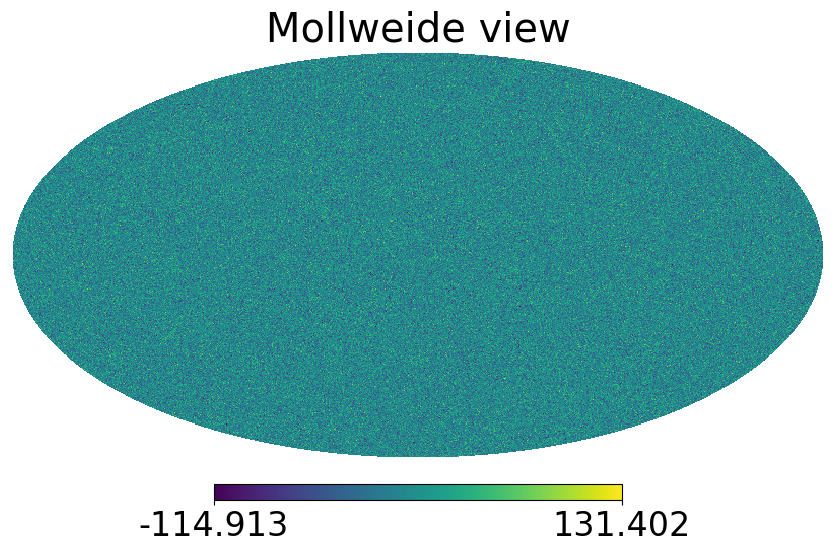

In [13]:
hp.mollview(ksz)


In [14]:
# np.mean(ksz)


In [15]:
npix_ksz = len(ksz)
nside_ksz = hp.npix2nside(npix_ksz)
pix_theta, pix_phi = hp.pix2ang(nside_ksz, np.arange(npix_ksz))
pix_ra, pix_dec = ang2eq(pix_theta, pix_phi)




In [16]:
# ra_y, dec_y, ymap_truth = np.array(rad2deg * ras.flatten()), np.array(rad2deg * decs.flatten()), np.array(imapy.flatten())    
ytruth_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=ksz, ra_units='degrees', dec_units='degrees')

dytruth = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')
randytruth = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')

print('doing dataxy calculation')
dytruth.process(datapoint_cat, ytruth_cat)

print('doing randomxy calculation')
randytruth.process(rand_cat, ytruth_cat)
dytruth.calculateXi(rk=randytruth)

xi_dy_full = dytruth.xi
r_dy = np.exp(dytruth.meanlogr)
cov_dy = dytruth.cov
sig_dy = np.sqrt(np.diag(cov_dy))
# print(




doing dataxy calculation
doing randomxy calculation


In [17]:
xi_dy_full



array([-0.22588695,  0.07428321, -0.10620453, -0.10731554, -0.14684528,
        0.05371932, -0.0621896 , -0.01041509,  0.02523449,  0.03586224,
       -0.00229251,  0.01530469,  0.02823123,  0.00647493, -0.00427214,
       -0.0008512 ,  0.00509783,  0.00140419,  0.00224527,  0.00145457])

In [18]:
# ra_y, dec_y, ymap_truth = np.array(rad2deg * ras.flatten()), np.array(rad2deg * decs.flatten()), np.array(imapy.flatten())    
ytruth_cat2 = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=ksz**2, ra_units='degrees', dec_units='degrees')

dytruth2 = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')
randytruth2 = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')

print('doing dataxy calculation')
dytruth2.process(datapoint_cat, ytruth_cat2)

print('doing randomxy calculation')
randytruth2.process(rand_cat, ytruth_cat2)
dytruth2.calculateXi(rk=randytruth2)

xi_dy_full2 = dytruth2.xi
r_dy2 = np.exp(dytruth2.meanlogr)
cov_dy2 = dytruth2.cov
sig_dy2 = np.sqrt(np.diag(cov_dy2))



doing dataxy calculation
doing randomxy calculation


In [19]:
print(np.dot(xi_dy_full2, np.dot(np.linalg.inv(cov_dy2), xi_dy_full2)))
      
    

542.6299959034619


In [20]:
# ra_y, dec_y, ymap_truth = np.array(rad2deg * ras.flatten()), np.array(rad2deg * decs.flatten()), np.array(imapy.flatten())    
ytruth_cat_abs = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=np.abs(ksz), ra_units='degrees', dec_units='degrees')

dytruth_abs = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')
randytruth_abs = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')

print('doing dataxy calculation')
dytruth_abs.process(datapoint_cat, ytruth_cat_abs)

print('doing randomxy calculation')
randytruth_abs.process(rand_cat, ytruth_cat_abs)
dytruth_abs.calculateXi(rk=randytruth_abs)

xi_dy_full_abs = dytruth_abs.xi
r_dy_abs = np.exp(dytruth_abs.meanlogr)
cov_dy_abs = dytruth_abs.cov
sig_dy_abs = np.sqrt(np.diag(cov_dy_abs))



doing dataxy calculation
doing randomxy calculation


In [21]:
print(np.dot(xi_dy_full_abs, np.dot(np.linalg.inv(cov_dy_abs), xi_dy_full_abs)))




417.5580759779912


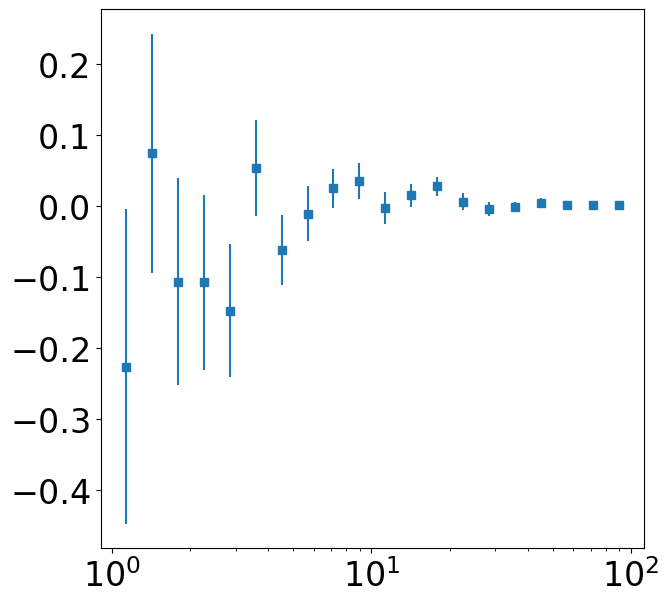

In [22]:
# xi_dy_full_abs
pl.figure()
pl.errorbar(r_dy, xi_dy_full, sig_dy, ls='', marker='s')
# pl.errorbar(r_dy_abs*1.05, xi_dy_full2, sig_dy2, ls='', marker='o')
pl.xscale('log')
# pl.yscale('log')




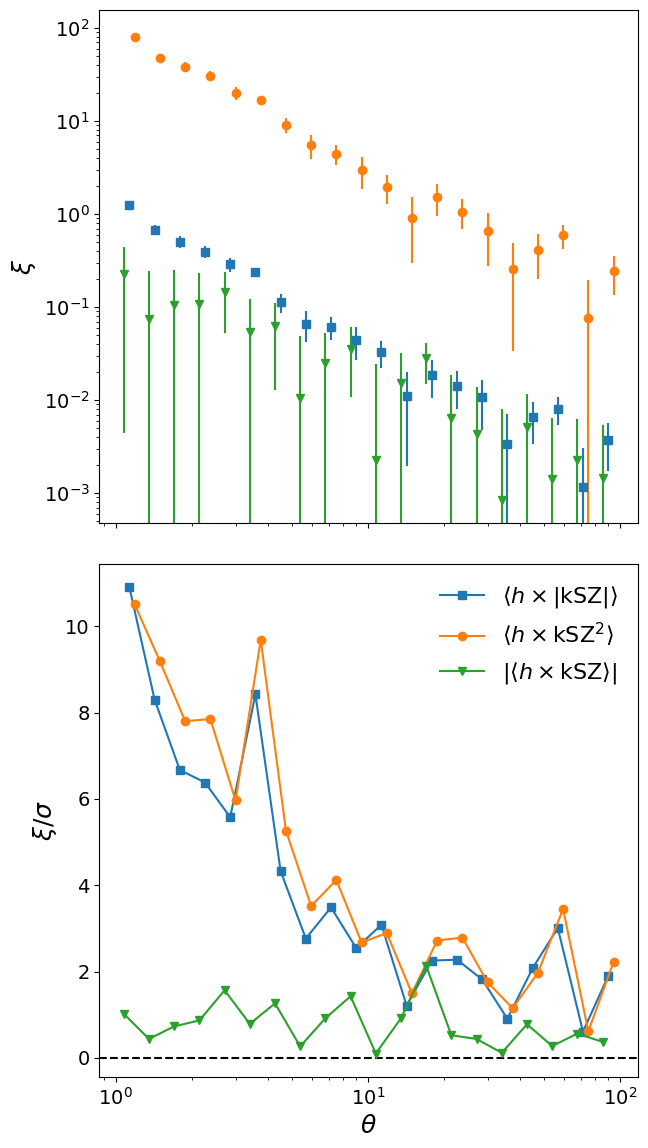

In [23]:
import matplotlib.pyplot as plt

# create the first subplot
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(7, 12))
plt.subplots_adjust(hspace=0.05)
ax1.errorbar(r_dy_abs, xi_dy_full_abs, sig_dy_abs, ls='', marker='s', label=r'$\langle h \times |\rm{kSZ}| \rangle$')
ax1.errorbar(r_dy_abs*1.05, xi_dy_full2, sig_dy2, ls='', marker='o', label=r'$\langle h  \times \rm{kSZ}^2 \rangle$')
ax1.errorbar(0.95*r_dy, np.abs(xi_dy_full), sig_dy, ls='', marker='v', label=r'$|\langle h  \times \rm{kSZ} \rangle|$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='both', labelsize=14)
# ax1.legend(fontsize=16, frameon=False)
ax1.set_ylabel(r'$\xi$', size=18)

# create the second subplot
ax2.errorbar(r_dy_abs, xi_dy_full_abs/sig_dy_abs, ls='-', marker='s', label=r'$\langle h \times |\rm{kSZ}| \rangle$')
ax2.errorbar(r_dy_abs*1.05, xi_dy_full2/sig_dy2, ls='-', marker='o', label=r'$\langle h  \times \rm{kSZ}^2 \rangle$')
ax2.errorbar(0.95*r_dy, np.abs(xi_dy_full)/sig_dy, ls='-', marker='v', label=r'$|\langle h  \times \rm{kSZ} \rangle|$')
ax2.axhline(0.0, ls='--', color='k')
ax2.set_xscale('log')
ax2.tick_params(axis='both', labelsize=14)
ax2.legend(fontsize=16, frameon=False)
ax2.set_xlabel(r'$\theta$', size=18)
ax2.set_ylabel(r'$\xi/\sigma$', size=18)

# display the plot
# plt.show()
plt.tight_layout()
# plt.savefig('ksz_yuuki_cross_halos_Mgt_' + '1e14' + '_zlt_0p5' + '_noiseless.pdf')
plt.savefig('ksz_yuuki_cross_halos_Mgt_' + '1e14' + '_zlt_0p5' + '_10signoise.pdf')
# plt.savefig('ksz_cross_halos_Mgt_' + '1e14' + '_zlt_0p5' + '_websky.pdf')




In [32]:
nestpix = hp.ang2pix(2048,datapoint_ra, datapoint_dec,nest=True,lonlat=True)
pix = nestpix
pix.sort()
first = np.where(pix[:-1] != pix[1:])[0] + 1
first = np.concatenate(([0],first))
hpix = pix[first]
cts = np.diff(first,append=len(pix))
m = np.zeros(hp.nside2npix(2048),dtype=int)
m[hpix] = cts
density_halo = -1 + m/np.mean(m)
density_halo = hp.reorder(density_halo, n2r=True)


In [49]:
# hp.mollview(np.log(1.001 + density_halo), nest=True)
hp.write_map('takahashi_density_halo_Mgt_5e13_zlt_0p5_ns2048.fits', density_halo)



setting the output map dtype to [dtype('float64')]


In [50]:
hp.write_map('takahashi_ksz_wnoise_3sigma_ns2048.fits', ksz)



setting the output map dtype to [dtype('float64')]


In [37]:
Cls_ksz_h = hp.anafast(density_halo, ksz)
Cls_absksz_h = hp.anafast(density_halo, np.abs(ksz))
Cls_ksz2_h = hp.anafast(density_halo, (ksz)**2)
ells = np.arange(len(Cls_ksz_h))




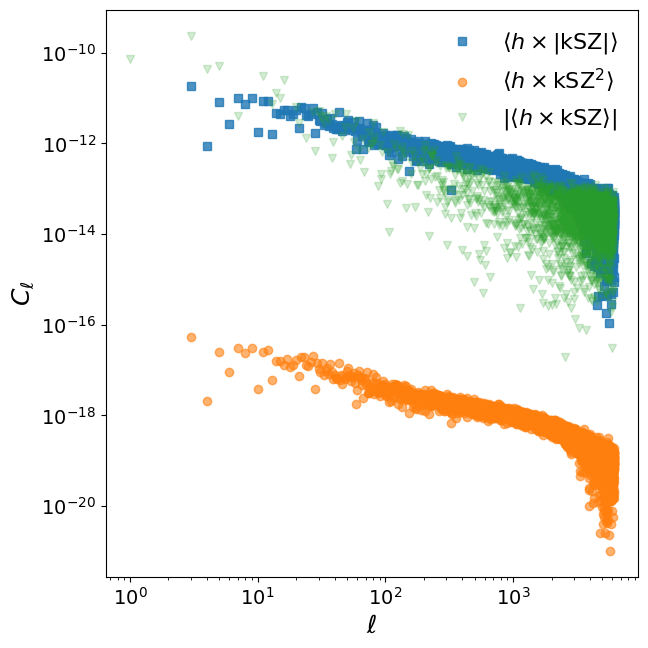

In [47]:
pl.figure()
pl.plot(ells, Cls_absksz_h, ls='', alpha=0.8, marker='s', label=r'$\langle h \times |\rm{kSZ}| \rangle$')
pl.plot(ells, Cls_ksz2_h, ls='', alpha=0.6, marker='o', label=r'$\langle h  \times \rm{kSZ}^2 \rangle$')
pl.plot(ells, Cls_ksz_h, ls='', alpha=0.2, marker='v', label=r'$|\langle h  \times \rm{kSZ} \rangle|$')
pl.xscale('log')
pl.yscale('log')
# pl.set_xscale('log')
# pl.set_yscale('log')
pl.tick_params(axis='both', labelsize=14)
pl.legend(fontsize=16, frameon=False)
pl.ylabel(r'$C_{\ell}$', size=18)
pl.xlabel(r'${\ell}$', size=18)
# pl.ylim(1e-6, 1e-3)
pl.tight_layout()
pl.savefig('harmonic_ksz_cross_halos_Mgt_' + '5e13' + '_zlt_0p5' + '_3signoise.pdf')



(1e-06, 0.001)

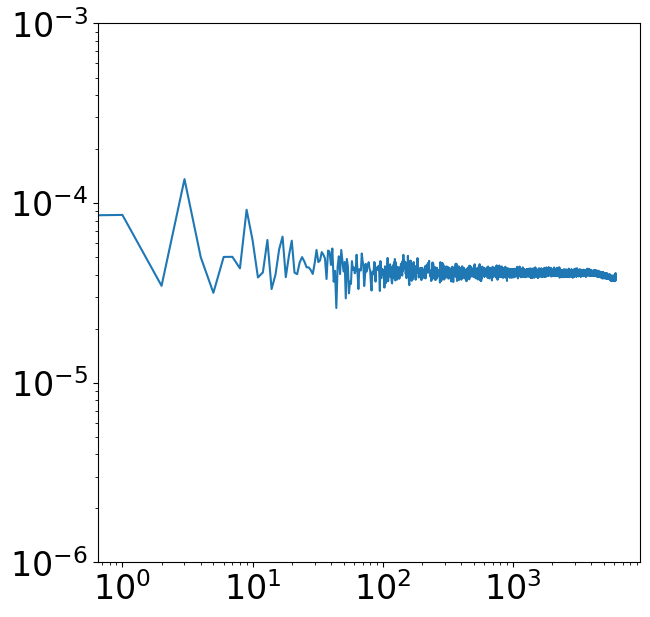

In [47]:
pl.figure()
pl.plot(ells, Cls)
pl.xscale('log')
pl.yscale('log')
pl.ylim(1e-6, 1e-3)



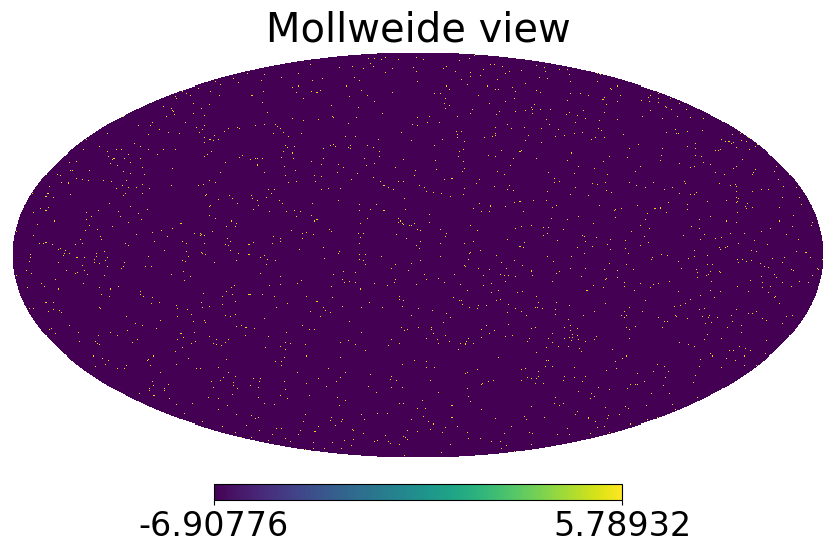

findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


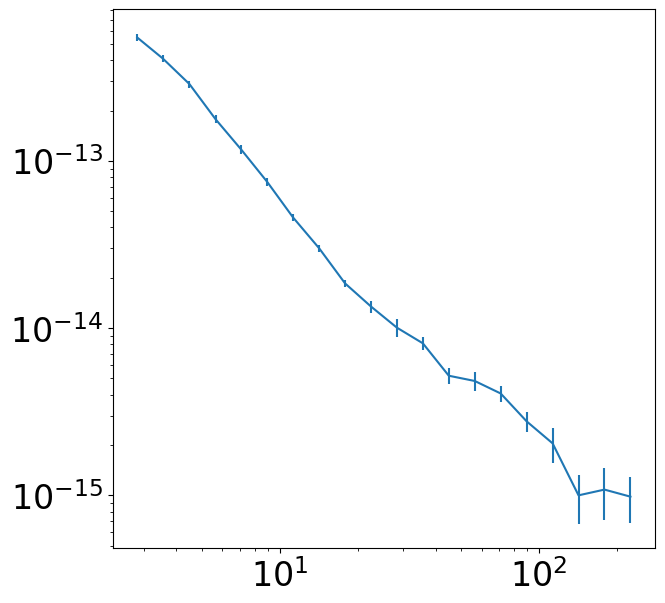

In [47]:
# xi_dy_full_abs
pl.figure()
pl.errorbar(r_dy_abs, xi_dy_full2, sig_dy2)
pl.xscale('log')
pl.yscale('log')




In [48]:
# df = hp.read_map('/global/cfs/cdirs/lsst/www/shivamp/ksz_test/allsky_HP_kSZ_nres13_r000.fits')
# ksz = hp.ud_grade(df, 1024)
# # print(hp.npix2nside(len(df)))
# # hp.mollview(np.log(np.abs(df_ud)))



129602594


30185


In [6]:
datapoint_ra, datapoint_dec = ang2eq(theta_i[indsel], phi_i[indsel])
datapoint_w = np.ones_like(datapoint_ra)
nrand = 10*len(datapoint_ra)
rand_ra, rand_dec = esutil.coords.randsphere(nrand, ra_range=[0,360], dec_range=[-90,90])
rand_theta, rand_phi = eq2ang(rand_ra, rand_dec)
rand_w = np.ones_like(rand_ra)




In [9]:
# ra_y, dec_y, ymap_truth = np.array(rad2deg * ras.flatten()), np.array(rad2deg * decs.flatten()), np.array(imapy.flatten())    
ytruth_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=ksz, ra_units='degrees', dec_units='degrees')

dytruth = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')
randytruth = treecorr.NKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')

print('doing dataxy calculation')
dytruth.process(datapoint_cat, ytruth_cat)

print('doing randomxy calculation')
randytruth.process(rand_cat, ytruth_cat)
dytruth.calculateXi(rk=randytruth)

xi_dy_full = dytruth.xi
r_dy = np.exp(dytruth.meanlogr)
cov_dy = dytruth.cov
sig_dy = np.sqrt(np.diag(cov_dy))
print(xi_dy_full)




NameError: name 'pix_ra' is not defined

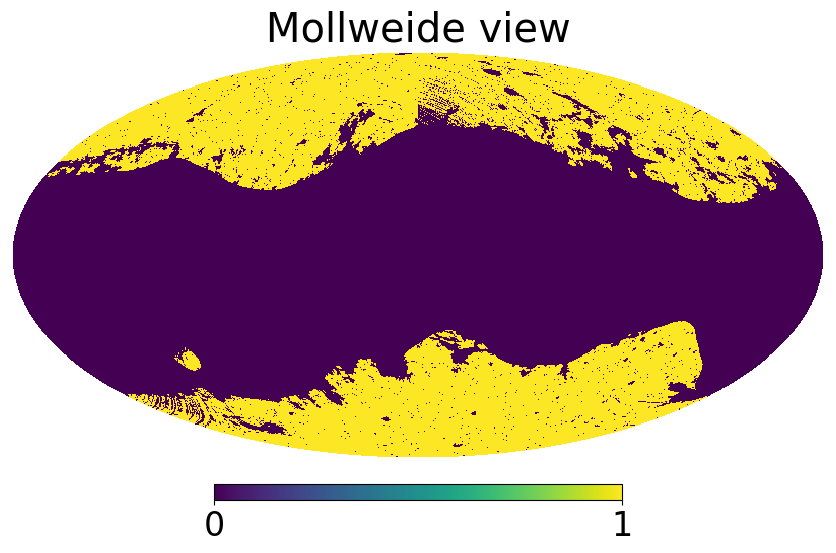

In [1]:
# More specifically, we recommend using
# thresholds of 2.5×1020 cm−2 (353 GHz), 2.0×1020 cm−2 (545
# GHz), and 1.8×1020 cm−2 (857 GHz)
import healpy as hp
from astropy.io import fits
import numpy as np
import treecorr
import esutil
# from pixell import utils, bunch
# import numpy as np, pyccl, time
# import pyccl
import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl
pl.rcParams.update({
    "text.usetex": False,
    "font.family": "DejaVu Sans"
})



# 353
df = hp.read_map('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/planck_data/lenz17/545/mask_bool.fits')
hp.mollview(df)
# hp.npix2nside(len(df))



In [2]:
r = hp.Rotator(coord=['G','C'])
df_rotated = r.rotate_map_alms(df)



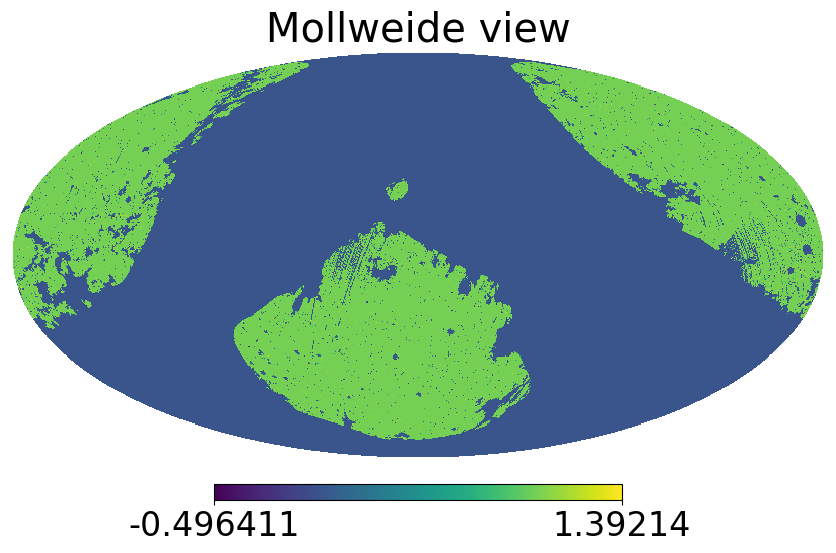

In [3]:
hp.mollview(df_rotated)



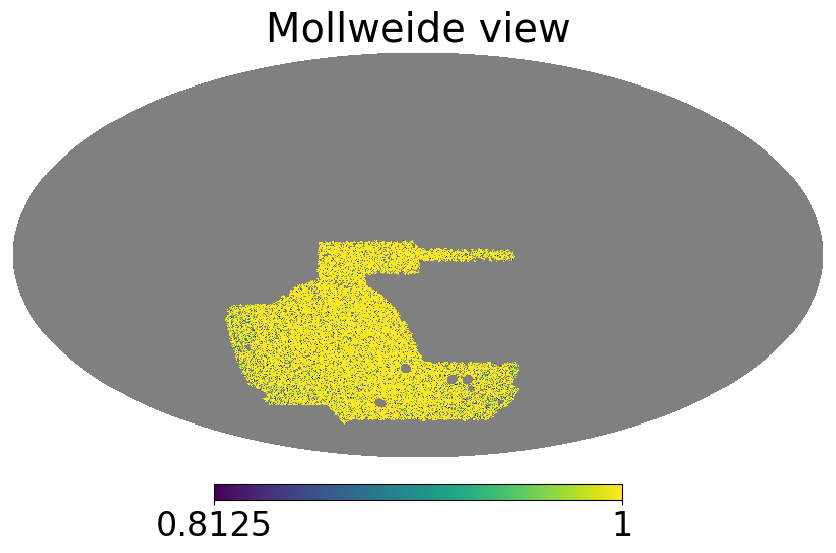

In [17]:
mask_des = hp.read_map('/global/cfs/cdirs/des/data_actxdes/des_data/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask.fits.gz', partial=True)
hp.mollview(mask_des)



In [8]:
indsel = np.where(df_rotated > 0.1)[0]
df_rotated[indsel] = 1.

indsel = np.where(df_rotated < 0.1)[0]
df_rotated[indsel] = 0.



In [19]:
# mask_des = hp.ud_grade(mask_des, 2048)

# indsel = np.where(mask_des > 0.1)[0]
# mask_des[indsel] = 1.

# indsel = np.where(mask_des < 0.1)[0]
# mask_des[indsel] = 0.



In [23]:
mask_f = hp.read_map('/global/cfs/cdirs/des/data_actxdes/mask_updated_ACTDR6xDESY3.fits')
# nside = 2048
nside = 4096

mask_des = hp.ud_grade(mask_f, 2048)

indsel = np.where(mask_des > 0.1)[0]
mask_des[indsel] = 1.

indsel = np.where(mask_des < 0.1)[0]
mask_des[indsel] = 0.


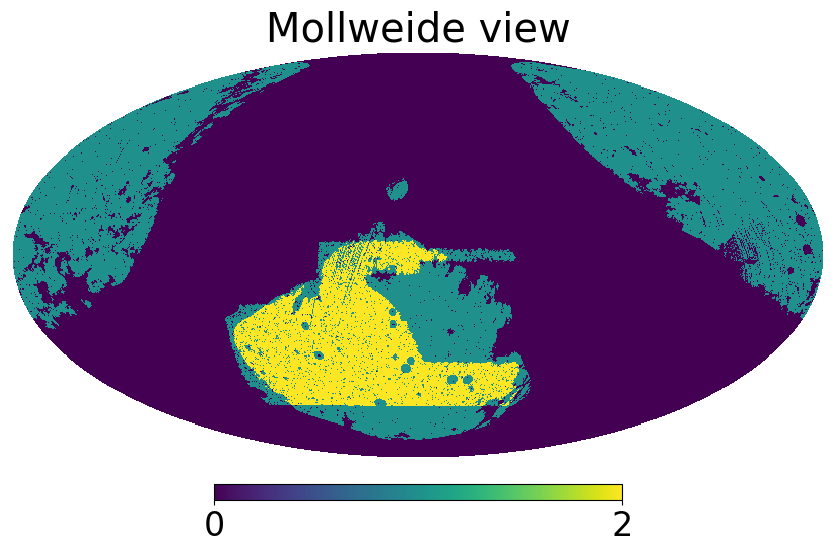

In [24]:
hp.mollview(df_rotated+mask_des)



In [25]:
indsel = np.where(df_rotated+mask_des == 2)[0]



In [26]:
print(len(indsel) * hp.nside2pixarea(2048, degrees=True))



3516.269084351507


In [14]:
hp.nside2pixarea(2048, degrees=True)*(60**2)


2.9506417214455083